In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

In [2]:
num_iteration = 20000
mc_iteration = 10

# Loading simulated image data

In [3]:
A_matrix = scipy.sparse.load_npz('simulated_large_A_117_100.npz')

x_vec = np.load("simulated_large_x_117_100.npy")
Ax = A_matrix@x_vec.flatten()

print("Image vector x is of shape {}".format(np.shape(x_vec)))
print("Mixing matrix A is of shape {}".format(np.shape(A_matrix)))
print("Observation matrix Y is of shape {}".format(len(Ax)))

# Initialize x with vector of all ones.
x_init = np.ones(x_vec.shape)

Image vector x is of shape (10000,)
Mixing matrix A is of shape (33362, 10000)
Observation matrix Y is of shape 33362


# Gradient Ascent for poisson distributed data

In [4]:
def compute_gradient(x_old, A_mat, y_obser):
    inner_term_final = 0
    if len(x_old.shape) > 1:
        x_old = np.transpose(x_old)
    inner_term_final = (A_mat.T * ((y_obser/(A_mat @ x_old)) - 1))
    return inner_term_final

def _get_new_x(x_old, grad, lr_r=0.01):
    x_new = (x_old + lr_r*(grad))
    return x_new

In [5]:
# Run GD multiple times and average estimates with new y. Randomness from poisson
verbose = 2000
estimates_mc = []
Ax = A_matrix@x_vec.flatten()

for epoc in range(mc_iteration):
    x_init = np.ones(x_vec.shape)
    print(f"{epoc}th run start =>")
    y_observation = np.random.poisson(Ax)
    for i in range(num_iteration):
        grad = compute_gradient(x_init, A_matrix, y_observation)
        x_new = _get_new_x(x_init, grad)
        diff = np.linalg.norm(x_new - x_init)
        mse = np.linalg.norm(x_new - x_vec)  
        if i % verbose == 0:
            print(f'step: {i:2d}, diff: {diff: .4E}, mse: {mse:8.4f}')            
        if (diff <= 1e-5):
            break
        x_init = x_new
    estimates_mc.append(x_new)
    mse = np.linalg.norm(x_new - x_vec)
    print(f'epoc: {epoc:2d}, diff: {diff: .4E}, mse: {mse:8.4f}, step: {i:2d}')

0th run start =>
step:  0, diff:  1.2742E+04, mse: 8604.3679
step: 2000, diff:  4.1020E-01, mse: 2311.7166
step: 4000, diff:  2.0655E-01, mse: 1954.2913
step: 6000, diff:  1.3822E-01, mse: 1746.2440
step: 8000, diff:  1.0186E-01, mse: 1606.2002
step: 10000, diff:  7.9601E-02, mse: 1505.3847
step: 12000, diff:  6.4790E-02, mse: 1429.7330
step: 14000, diff:  5.4172E-02, mse: 1371.3887
step: 16000, diff:  4.6291E-02, mse: 1325.4696
step: 18000, diff:  4.0229E-02, mse: 1288.7663
epoc:  0, diff:  3.5441E-02, mse: 1259.0907, step: 19999
1th run start =>
step:  0, diff:  1.2742E+04, mse: 8603.8675
step: 2000, diff:  4.1030E-01, mse: 2312.4554
step: 4000, diff:  2.0632E-01, mse: 1955.7687
step: 6000, diff:  1.3790E-01, mse: 1748.2325
step: 8000, diff:  1.0183E-01, mse: 1608.5841
step: 10000, diff:  7.9656E-02, mse: 1508.1892
step: 12000, diff:  6.4771E-02, mse: 1433.0089
step: 14000, diff:  5.4156E-02, mse: 1375.1135
step: 16000, diff:  4.6267E-02, mse: 1329.5984
step: 18000, diff:  4.0191E-02

In [6]:
avg_estimate = sum(estimates_mc)/len(estimates_mc)
mse = np.linalg.norm(avg_estimate - x_vec)
print("Averaged estimate error:{}".format(mse))

Averaged estimate error:1109.1423961266505


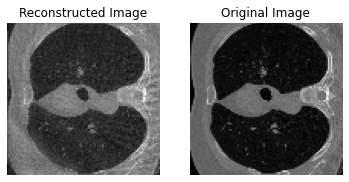

In [7]:
size = int(np.sqrt(len(x_vec)))
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_new.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_vec.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()